# **Digit determine with Keras and TensorFlow**

In [1]:
import pandas as pd
from skimage import io

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# ** Data preparation**

In [6]:
data_train = pd.read_csv('train.csv')
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,:1]

In [7]:
X_train /= 255
X_train = X_train.as_matrix()
y_train = np_utils.to_categorical(y_train, 10)

# **Building model**

In [8]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stopping=EarlyStopping(monitor='loss')
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s - loss: 0.4169 - acc: 0.8813 - val_loss: 0.1937 - val_acc: 0.9443
Epoch 2/20
33600/33600 [==============================] - 2s - loss: 0.1666 - acc: 0.9511 - val_loss: 0.1476 - val_acc: 0.9556
Epoch 3/20
33600/33600 [==============================] - 2s - loss: 0.1160 - acc: 0.9651 - val_loss: 0.1229 - val_acc: 0.9618
Epoch 4/20
33600/33600 [==============================] - 2s - loss: 0.0885 - acc: 0.9732 - val_loss: 0.1192 - val_acc: 0.9635
Epoch 5/20
33600/33600 [==============================] - 2s - loss: 0.0677 - acc: 0.9792 - val_loss: 0.1129 - val_acc: 0.9658
Epoch 6/20
33600/33600 [==============================] - 2s - loss: 0.0536 - acc: 0.9841 - val_loss: 0.1029 - val_acc: 0.9696
Epoch 7/20
33600/33600 [==============================] - 2s - loss: 0.0421 - acc: 0.9874 - val_loss: 0.0942 - val_acc: 0.9719
Epoch 8/20
33600/33600 [==============================] - 2s -

# **Check prediction**

In [10]:
def check_prediction(img_path):
        img = io.imread(img_path, as_grey=True)
        img = img.reshape(28,28)
        print("Your handwritten digit")
        io.imshow(img)
        io.show()
        img = img.reshape(1, 784)
        prediction = model.predict_classes(img)
        print(f"The model recognized the digit ---> {prediction} <---")

Your handwritten digit


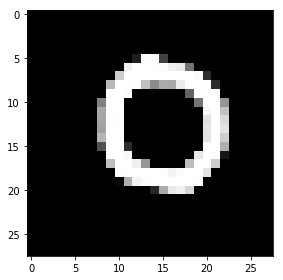

1/1 [==============================] - 0s
The model recognized the digit ---> [0] <---


In [11]:
check_prediction("ExamDigits/0.png")